# Цель работы:
Изучение алгоритмов и методов регрессии на практике.

# Индивидуальное задание:
Вариант 2

# Результат выполнения работы 

### Импорт нужных библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yellowbrick
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

## 1 часть

Был создан датафрейм в соответствии с вариантом. На основе данного датафрейма будет осществлено обучение линейной регрессии

In [2]:
x_first = np.array([3, 3, 6, 6, 7, 8, 9])
y_first = np.array([30.8, 31.1, 30.04, 31.7, 30.5, 33.5, 31])
df_first = pd.DataFrame({'X': x_first, 'Actual': y_first})
df_first

,X,Actual
0,3,30.80
1,3,31.10
2,6,30.04
3,6,31.70
4,7,30.50
5,8,33.50
6,9,31.00


Обучение модели регрессии 

In [3]:
model_first = LinearRegression()
model_first.fit(x_first.reshape(-1,1), y_first)
model_first_pred = model_first.predict(x_first.reshape(-1,1))

Создание датафрейма с истинными и предсказанными данными

In [4]:
df_first['Predict'] = model_first_pred
df_first

,X,Actual,Predict
0,3,30.80,30.784286
1,3,31.10,30.784286
2,6,30.04,31.234286
3,6,31.70,31.234286
4,7,30.50,31.384286
5,8,33.50,31.534286
6,9,31.00,31.684286


Посчитаны метрики оценки качества регрессии - MAE, MSE, RMSE, R2.

In [5]:
print('MAE:', metrics.mean_absolute_error(y_first, model_first_pred))
print('MSE:', metrics.mean_squared_error(y_first, model_first_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_first, model_first_pred)))
print('R2:', metrics.r2_score(y_first, model_first_pred))

MAE: 0.789387755102041
MSE: 0.9796244897959177
RMSE: 0.9897598141953015
R2: 0.09501975807668017


- MAE (Mean Absolute Error): Средняя абсолютная ошибка составляет примерно 0.79. Это значение показывает среднюю разницу (по модулю) между фактическими значениями и предсказанными. MAE является интерпретируемой метрикой, так как она указывает на среднее абсолютное отклонение в тех же единицах, что и данные. Чем ближе MAE к нулю, тем точнее модель.

- MSE (Mean Squared Error): Среднеквадратическая ошибка равна 0.98. Это метрика, чувствительная к крупным ошибкам, так как она возводит в квадрат отклонения. Поскольку она больше, чем MAE, это указывает на наличие больших отклонений в некоторых предсказанных значениях. MSE полезен, если мы хотим сильнее штрафовать большие ошибки.

- RMSE (Root Mean Squared Error): Корень из среднеквадратичной ошибки равен 0.99. Это значение близко к MSE, но интерпретируется в тех же единицах, что и данные, как и MAE. RMSE можно считать более интерпретируемой версией MSE, потому что он измеряет "средний размер ошибки" в тех же единицах, что и сами данные.

- R2 (Коэффициент детерминации): Значение R2— 0.095. Это довольно низкое значение, что говорит о том, что модель объясняет только 9.5% дисперсии в данных. Оставшиеся 90.5% разброса в данных не объяснены моделью. Это говорит о слабой зависимости между x и y и указывает на то, что модель неэффективно описывает данные.

Основной метрикой для оценки модели является коэффициент детерминации, в данном случае он очень маленький.

Выведем коэффициенты а и b линейной регрессии 

In [6]:
a_first = model_first.coef_
b_first = model_first.intercept_
print(a_first, b_first)

[0.15] 30.334285714285713


Была выполнена визуализация регрессии. Создается scatter plot для точек и линия регрессии на основе предсказанных значений

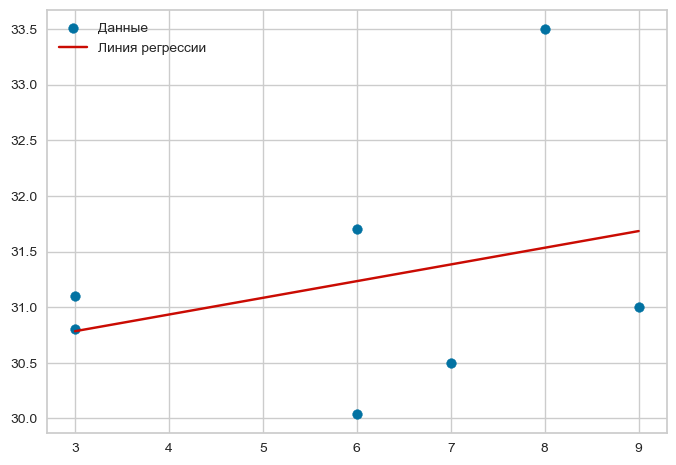

In [7]:
plt.scatter(x_first, y_first, label='Данные')
plt.plot([3, 9], [3 * a_first + b_first, 9 * a_first + b_first], 'r', label='Линия регрессии')
plt.legend()

Построен график с разницей предсказанного и истинного значения по каждой точке. Данный график показывает, насколько отличались предсказанные значения от изначальных.

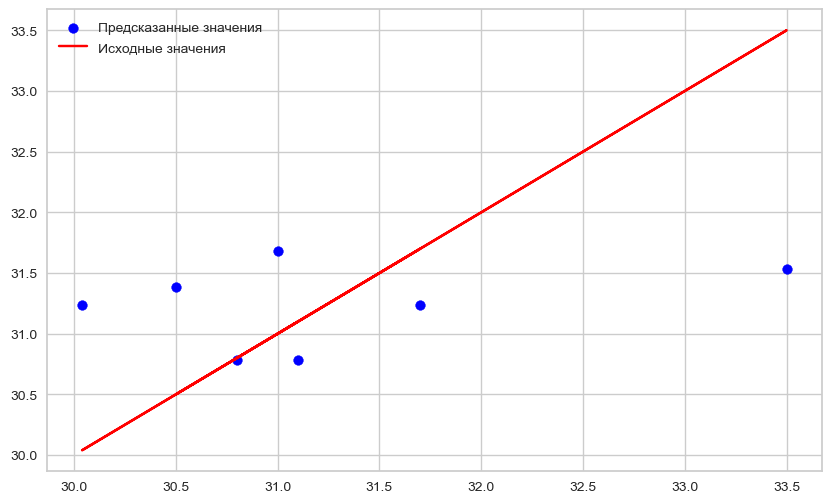

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_first, model_first_pred, label='Предсказанные значения', color='blue')
plt.plot(y_first, y_first, label='Исходные значения', color='red')
plt.legend()

Синяя точечная диаграмма показывает, как предсказанные значения (model_first) соотносятся с истинными значениями (y_first). Каждая точка представляет пару значений: истинное значение по оси x и предсказанное по оси y. Красная линия показывает линию идеальных предсказаний, то есть случаев, когда предсказанное значение точно совпадает с истинным. Многие точки предсказаний расположены далеко от красной линии, значит модель неточная

C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
C:\Users\Matvey\anaconda3\envs\data_science\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


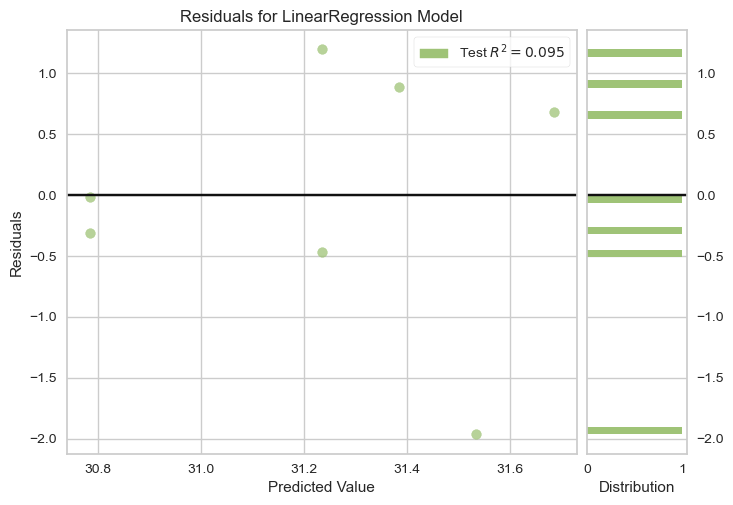

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [9]:
visualizer = ResidualsPlot(model_first)
visualizer.score(df_first[['X']], df_first['Actual']) 
visualizer.show()

По данному графику видно, что многие точки лежат далеко от параллели, значит модель неточно предсказывает значения

### Вывод для 1 части:
Предложенные для обучения данные не имеют никакой линейной связи, поэтому обучить линейную регрессию с коэффициентом детерминации >= 0.8 (считается хорошим показателем) невозможно.

## 2 часть

Ввод новых данных для 2 части

In [10]:
x_second = np.array([0, 1, 2, 3, 4, 5, 6])
y_second = np.array([26.6, 45.7, 63.8, 78.3, 86.4, 97.7, 96.9])

### Полином степени = 2

Обучение моделей полиномиальной регрессии со степенью 2

Для начала создадим модель полиномиальной регрессии со степенью 2 и произведём стандартизацию данных

In [11]:
poly_features_2 = PolynomialFeatures(degree=2)
x_poly_2 = poly_features_2.fit_transform(x_second.reshape(-1,1))

In [12]:
model_second_1 = LinearRegression()
model_second_1.fit(x_poly_2, y_second)
model_second_1_pred = model_second_1.predict(x_poly_2)

In [13]:
df_second = pd.DataFrame({'X': x_second, 'Actual': y_second, 'Predict': model_second_1_pred})
df_second

,X,Actual,Predict
0,0,26.6,25.902381
1,1,45.7,46.664286
2,2,63.8,63.942857
3,3,78.3,77.738095
4,4,86.4,88.050000
5,5,97.7,94.878571
6,6,96.9,98.223810


Оценка ошибок

In [14]:
print(f"Полиномиальная степень: 2")
print('MAE:', metrics.mean_absolute_error(y_second, model_second_1_pred))
print('R2:', metrics.r2_score(y_second, model_second_1_pred))

Полиномиальная степень: 2
MAE: 1.1659863945578226
R2: 0.9967286483229423


Средняя абсолютная ошибка модели низкая, что указывает на хорошее приближение предсказаний к реальным значениям.
Модель объясняет 99.7% дисперсии данных, что свидетельствует о высоком качестве предсказаний.

Можно сказать, что модель хорошо описывает зависимость данных

Визуализируем график регрессии

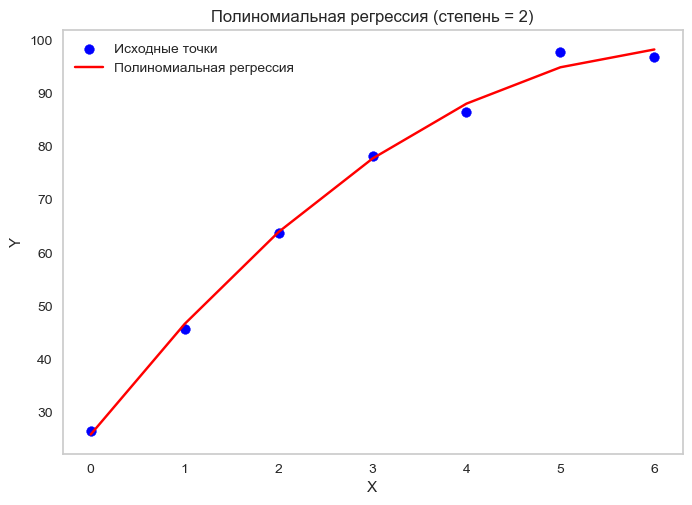

In [35]:
plt.scatter(x_second, y_second, color='blue', label='Исходные точки')
plt.plot(x_second, model_second_1_pred, color='red', label='Полиномиальная регрессия')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Полиномиальная регрессия (степень = 2)")
plt.legend()
plt.grid()

### Полином степени от 3 до 7

Обучим модель полиномиальной регрессии для 3 и более степению. По мере обучения также будем строить графики. 

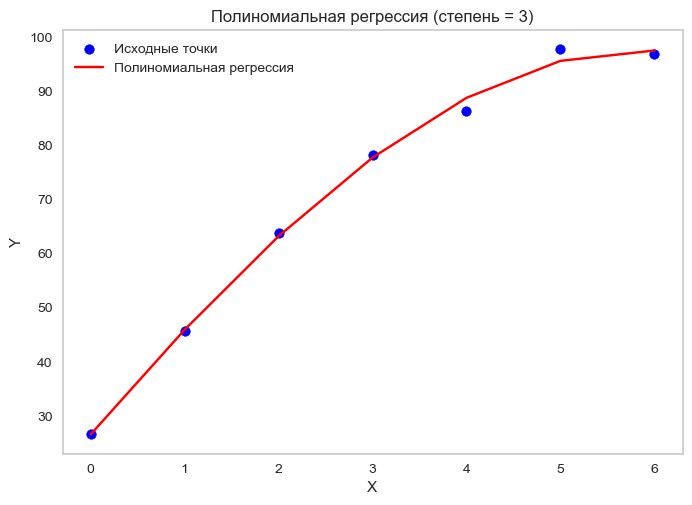

Полиномиальная регрессия (степень = 3)
MAE: 0.9258503401361041
R2:  0.9974391887618776


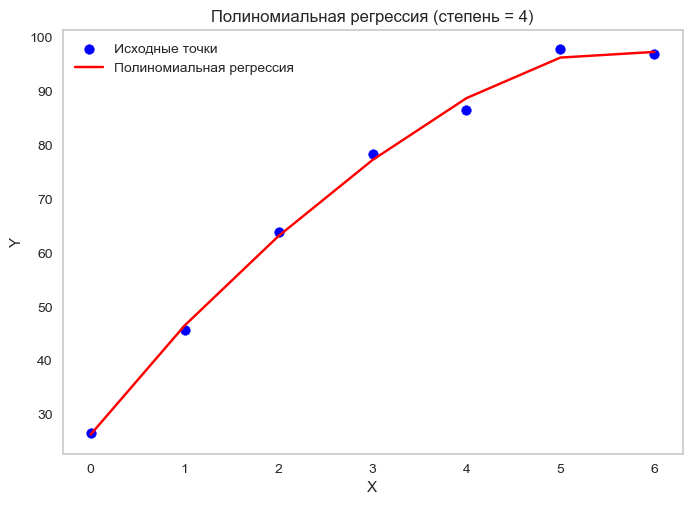

Полиномиальная регрессия (степень = 4)
MAE: 0.9944341372915783
R2:  0.997704030055332


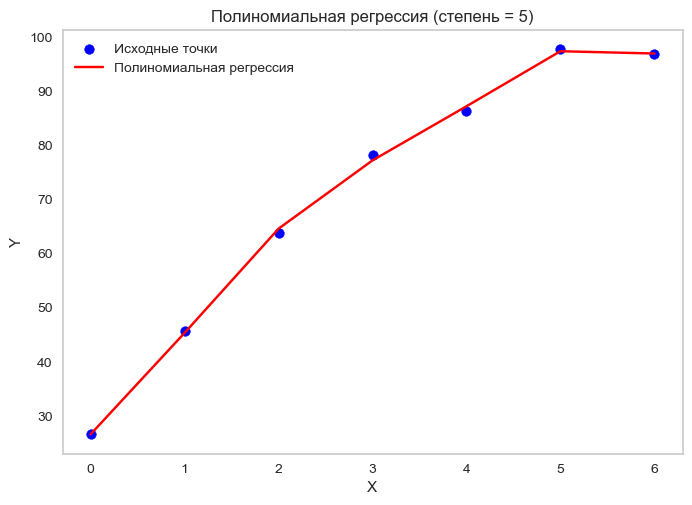

Полиномиальная регрессия (степень = 5)
MAE: 0.4937538651832765
R2:  0.9993786557850318


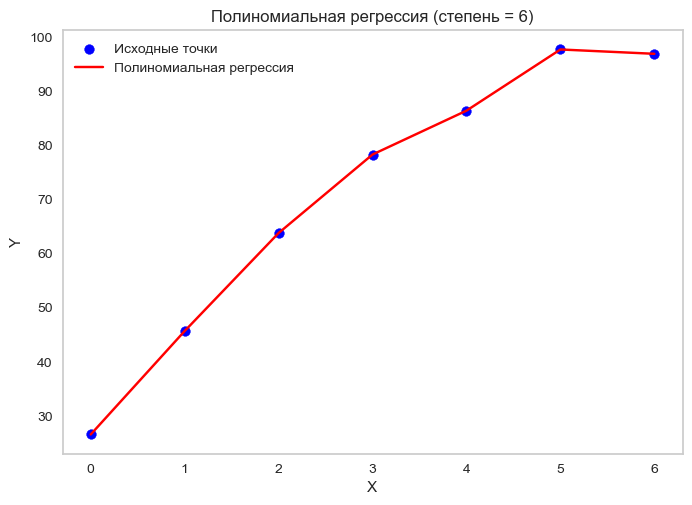

Полиномиальная регрессия (степень = 6)
MAE: 2.0142871497747753e-11
R2:  1.0


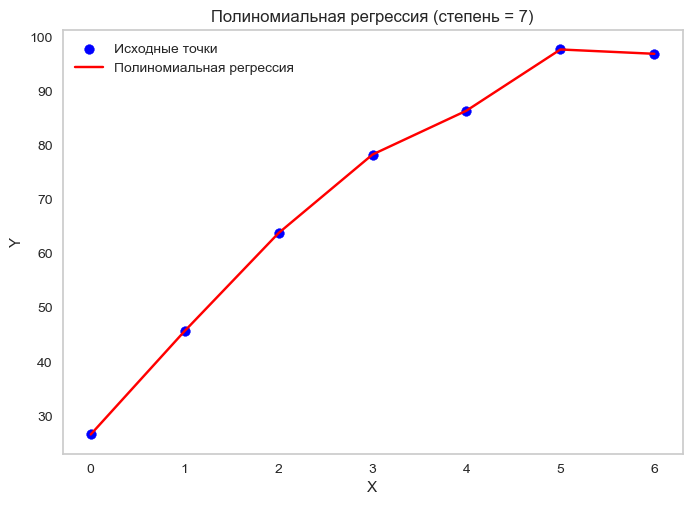

Полиномиальная регрессия (степень = 7)
MAE: 2.4731962509706915e-12
R2:  1.0


In [16]:
for i in range(3,8):
    poly_features_range = PolynomialFeatures(degree=i)
    x_poly_range = poly_features_range.fit_transform(x_second.reshape(-1,1))
    model_second_range = LinearRegression()
    model_second_range.fit(x_poly_range, y_second)
    model_second_range_pred = model_second_range.predict(x_poly_range)
    mae_poly_range = metrics.mean_absolute_error(y_second, model_second_range_pred)
    r2_poly_range = metrics.r2_score(y_second, model_second_range_pred)
    
    plt.scatter(x_second, y_second, color='blue', label='Исходные точки')
    plt.plot(x_second, model_second_range_pred, color='red', label='Полиномиальная регрессия')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Полиномиальная регрессия (степень = {i})")
    plt.legend()
    plt.grid()
    plt.show()
    print(f"Полиномиальная регрессия (степень = {i})")
    print('MAE:' ,mae_poly_range)
    print('R2: ', r2_poly_range)
  

### Вывод для 2 части
Исходя из значений метрик, можно сделать вывод, что для данных, полученных для обучения, нет смысла обучать модель для 4 и более степени. Дальше коэффициент детерминации всё ближе и ближе к 1.

## 3 часть

Запишем файл в датафрейм и выведем 5 строк для просмотра таблицы

In [17]:
df = pd.read_csv('carprice.csv')
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


В качестве целевой переменной для обучения была выбран столбец price тк при покупке машины большинство людей операются на данный параметр.

 По данной переменной построены два графика: гистограмма и ящик с усами

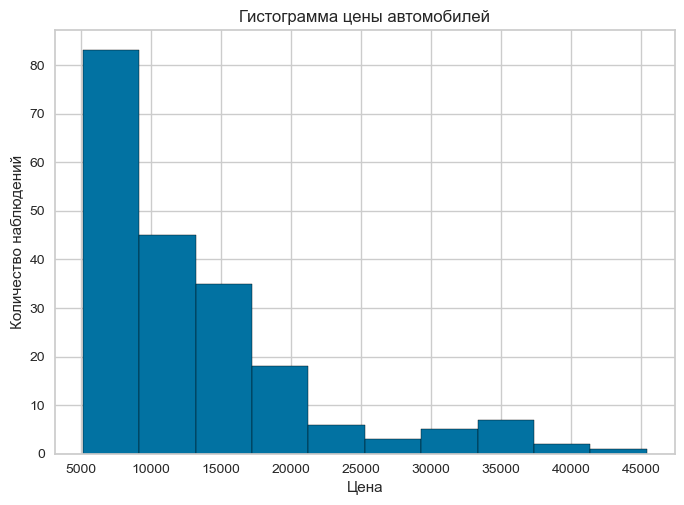

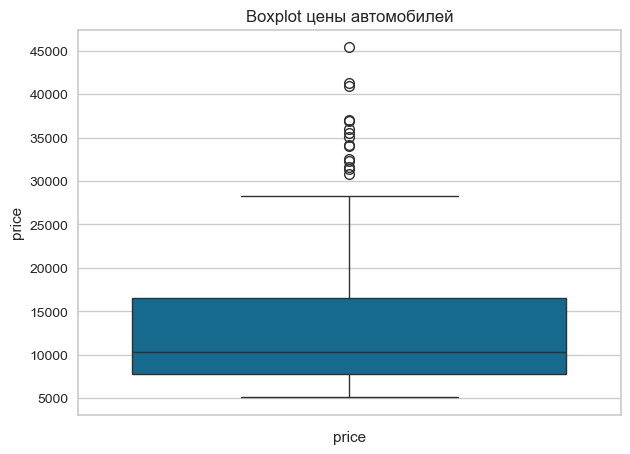

In [18]:
plt.hist(df['price'], edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма цены автомобилей')

plt.figure(figsize=(7, 5))
sns.boxplot(df['price'])
plt.xlabel('price')
plt.title('Boxplot цены автомобилей')
plt.show()

Медиана примерно равна 10000. Минимальное значение чуть больше 5000, а максимальное ≈ 45000.

Как видно из графиков, многие машины находятся в низком ценовом сегменте и стоят немного

In [19]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Выведем матрицу диаграмм рассеивания

Text(0.5, 0.98, 'Матрица диаграмм рассеяния')

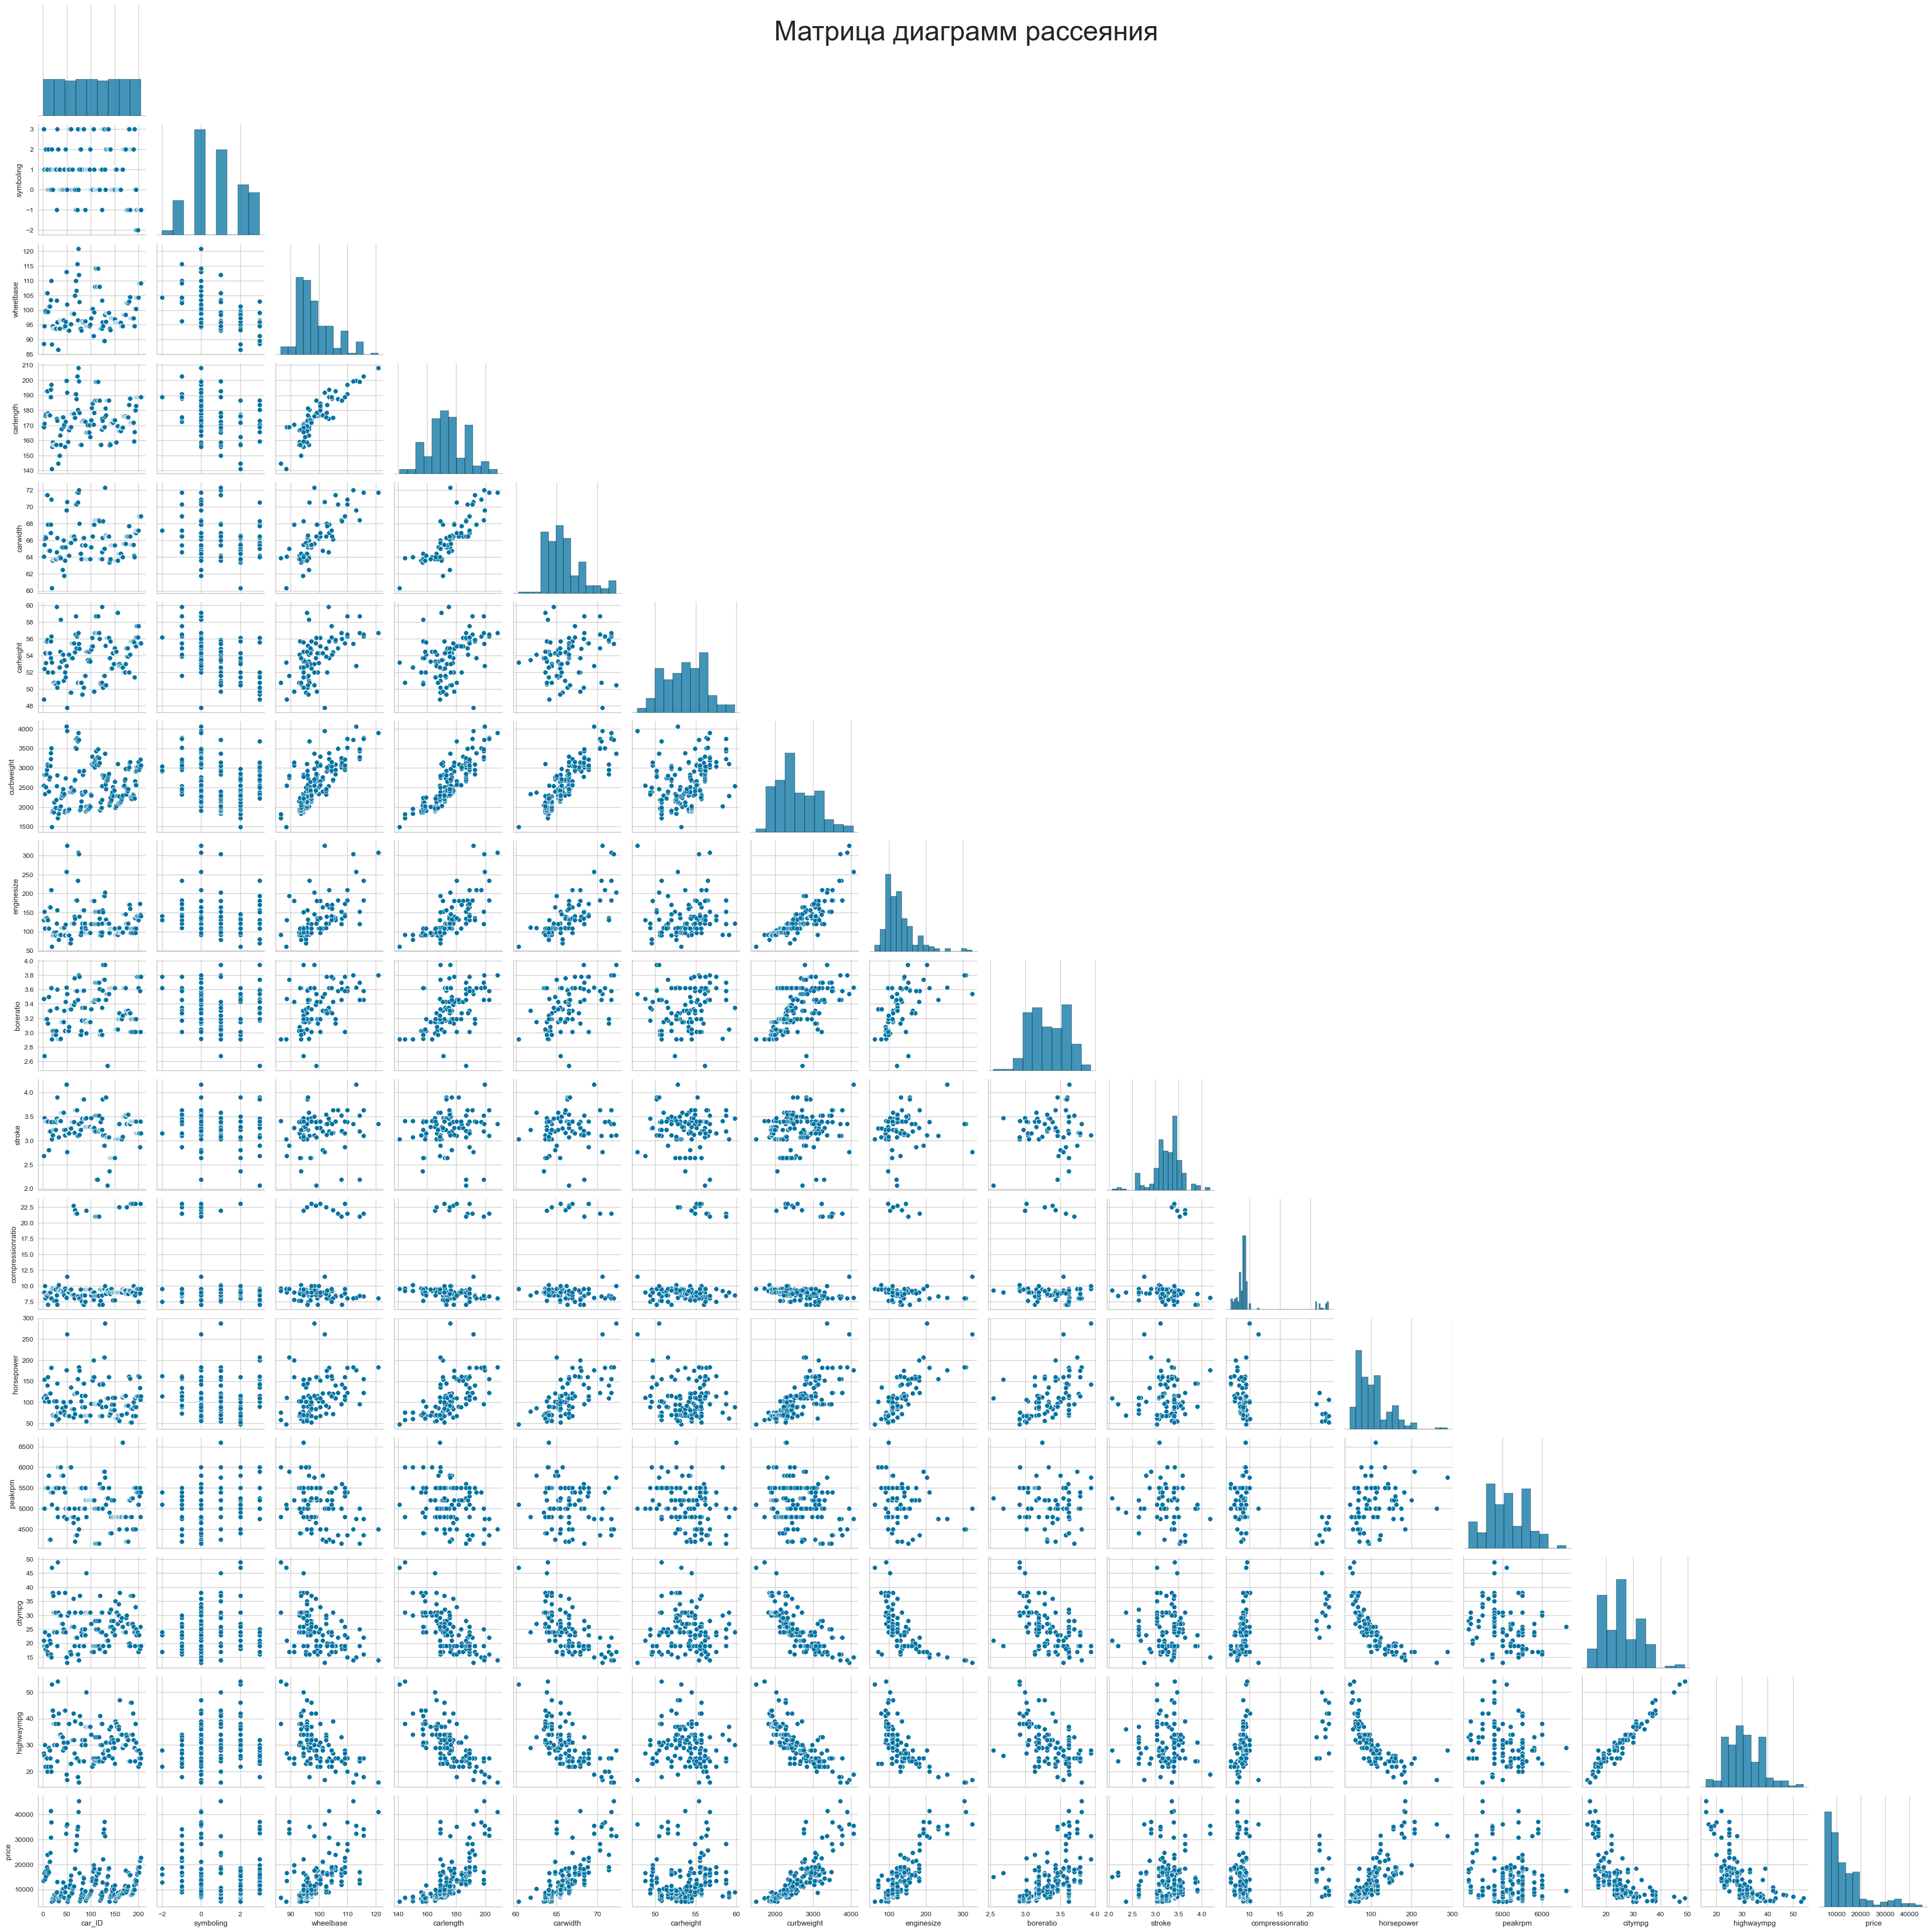

In [20]:
sns.pairplot(df, corner = True)
plt.suptitle('Матрица диаграмм рассеяния',size = 40)

Как видно из диаграмм, наблюдается корреляция между целевой переменной и переменными: wheelbase, carlength, carwidth, curbweight, enginsize, horsepower, citympg, highwaympg

Они же и будут признаками для обучения

Выделим из датафрейма нужные данные и разобьём их на обучающую и тестовую выборку.

In [21]:
data_first = df[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower','highwaympg','citympg']]
y_price = df['price']
x_train, x_test, y_train, y_test= train_test_split(data_first, y_price, test_size=0.2,random_state=3)

Посмотрим на значения корреляции к столбцу price

<Axes: >

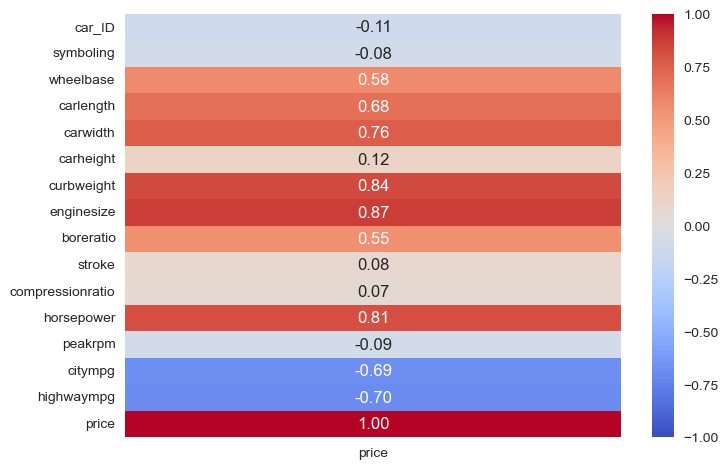

In [22]:
sns.heatmap(df.corr(numeric_only=True)['price'].to_frame(),cmap='coolwarm', vmin=-1, annot=True, fmt='.2f')

Производим стандартизацию данных

In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Обучаем модель

In [24]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)
predictions_valid = model.predict(x_test_scaled)

Создаём датафрейм истинных и предсказанных данных

In [25]:
result_first = pd.DataFrame({'Actual': y_test, 'Predicts': predictions_valid})
result_first

,Actual,Predicts
189,11595.0,9279.753762
183,7975.0,9774.318012
118,5572.0,5874.020636
165,9298.0,9383.574406
160,7738.0,8184.894893
70,31600.0,24210.281080
173,8948.0,12091.183017
154,7898.0,6148.688837
25,6692.0,6209.333239
71,34184.0,29922.553169


In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_valid))
print('MSE:', metrics.mean_squared_error(y_test, predictions_valid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_valid)))
print('R2:', metrics.r2_score(y_test, predictions_valid))

MAE: 2426.7286166406047
MSE: 11804297.206293056
RMSE: 3435.7382330866035
R2: 0.8571195210696831


Модель объясняет основную часть данных, но ошибки всё ещё высоки, это видно по среднеквадратичной и среднеабсолютной ошибке

Создан датафрейм с признаками и коэффициентом важности

In [27]:
df_for_first_model = pd.DataFrame({'Признак': data_first.columns, 'Коэффициент': model.coef_})
df_for_first_model.sort_values(by = 'Коэффициент', ascending = False)

,Признак,Коэффициент
4,enginesize,3201.512350
5,horsepower,2589.711505
3,curbweight,1211.845339
6,highwaympg,1096.428845
0,wheelbase,602.295271
2,carwidth,521.141353
1,carlength,-183.278508
7,citympg,-711.887156


<BarContainer object of 8 artists>

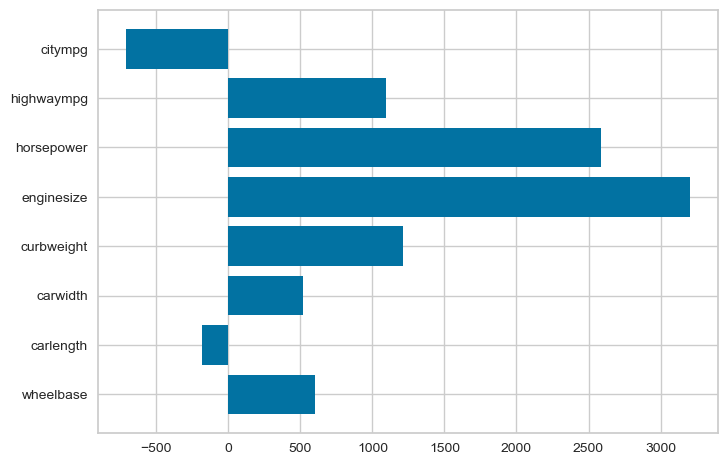

In [28]:
plt.barh(data_first.columns,model.coef_)

Высокую значимость имеют такие призанки как enginesize, horsepower, curbweight.


Наименьшую значимость имеет пробег по городу тк машины с наибольшим пробегом продают за наименьшую стоимость.

Важными признаками являются enginesize, horsepower, curbweight. Создадим датафрейм, проведём стандартизацию и обучим модель по этим данным

In [29]:
data_second = df[['enginesize','horsepower','curbweight']]
x_train, x_test, y_train, y_test= train_test_split(data_second, y_price, test_size=0.2,random_state=5)
scaler_second = StandardScaler()
x_train_scaled = scaler_second.fit_transform(x_train)
x_test_scaled = scaler_second.transform(x_test)
model_second = LinearRegression()
model_second.fit(x_train_scaled, y_train)
predictions_valid_second = model_second.predict(x_test_scaled)
result_second = pd.DataFrame({'Actual': y_test, 'Predicts': predictions_valid_second})
result_second

,Actual,Predicts
154,7898.0,7227.975681
21,5572.0,5523.285546
198,18420.0,18048.328238
48,35550.0,33784.491825
34,7129.0,6387.285673
194,12940.0,16292.996918
6,17710.0,15405.322417
25,6692.0,6014.496193
159,7788.0,8403.638260
122,7609.0,7560.506614


In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_valid_second))
print('MSE:', metrics.mean_squared_error(y_test, predictions_valid_second))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_valid_second)))
print('R2:', metrics.r2_score(y_test, predictions_valid_second))

MAE: 1828.0499438277677
MSE: 7858424.652182595
RMSE: 2803.288185717372
R2: 0.8849671107164403


Модель стала лучше улавливать закономерности в данных, а качество её предсказаний улучшилось, но есть и ошибки в прогнозированиях

## на 5

Было принято решение обучать на самых важных признаках: enginesize, horsepower, curbweight.

### дерево решений

In [31]:
data_second

,enginesize,horsepower,curbweight
0,130,111,2548
1,130,111,2548
2,152,154,2823
3,109,102,2337
4,136,115,2824
...,...,...,...
200,141,114,2952
201,141,160,3049
202,173,134,3012
203,145,106,3217


Проводим стандартизацию данных, разбиваем данные на обучающую и тестовую выборку, создаём и обучаем модель дерева решений

In [32]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data_second)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_price, test_size=0.2, random_state=42)

model_third = DecisionTreeRegressor(random_state=42)
model_third.fit(x_train, y_train)

model_third_pred = model_third.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, model_third_pred))
print('MSE:', metrics.mean_squared_error(y_test, model_third_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_third_pred)))
print('R2:', metrics.r2_score(y_test, model_third_pred))

MAE: 2006.8129999999999
MSE: 7783997.258631439
RMSE: 2789.981587507602
R2: 0.9013985204719004


В целом, модель демонстрирует хорошие результаты, хотя ещё есть погрешности на отдельных значениях, что отражается в значениях MAE и RMSE.

In [33]:
result_second = pd.DataFrame({'Actual': y_test, 'Predicts': model_third_pred})
result_second

,Actual,Predicts
15,30760.000,36880.0
9,17859.167,18620.0
100,9549.000,8949.0
132,11850.000,12170.0
68,28248.000,31600.0
95,7799.000,7349.0
159,7788.000,7898.0
162,9258.000,8358.0
147,10198.000,12290.0
182,7775.000,7995.0


### К-ближайших соседей

In [34]:
param_grid = {'n_neighbors': range(1, 20)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
best_n_neighbors = grid_search.best_params_['n_neighbors']

model_fourth = KNeighborsRegressor(n_neighbors=best_n_neighbors)
model_fourth.fit(x_train, y_train)

model_fourth_pred = model_fourth.predict(x_test)

print('MAE:', metrics.mean_absolute_error(y_test, model_fourth_pred))
print('MSE:', metrics.mean_squared_error(y_test, model_fourth_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, model_fourth_pred)))
print('R2:', metrics.r2_score(y_test, model_fourth_pred))

MAE: 2002.5569024390243
MSE: 9877175.101070464
RMSE: 3142.797336938935
R2: 0.8748838101858627


Модель работает неплохо, но есть заметные ошибки.

# ВЫВОД
В ходе выполнения лабораторной работы была освоена работа с различными видами регрессии.
В первой части работы была проведена работа с линейной регрессией. Изучили принципы построения модели обучение модели, вычисление метрик и визуализация результатов.


- MAE: 0.789387755102041,
- MSE: 0.9796244897959177,
- RMSE: 0.9897598141953015,
- R2: 0.09501975807668017.


Предложенные для обучения данные не имеют никакой линейной связи, поэтому обучить линейную регрессию с коэффициентом детерминации >= 0.8 (считается хорошим показателем) невозможно.
Во второй части была изучена модель полиномиальной регрессии. Данная модель очень хорошо описала предложенные для обучения данные. Коэффициент детерминации для данной модели стремиться к 1 с увеличением степени регрессию. Но дальше 4-ой степени обучать уже нет смысла


Третья часть работы посвящена работе с реальными данными, связанными со стоимостью машин на рынке. Перед обучением была осуществлена предобработка данных (стандартизация, разбиение на выборки). Было создано 4 модели:
- Линейная регрессия с первоначально выбранными для обучения данными,
- Линейная регрессия с данными с самым высоким коэффициентом,
- Дерево решений,
- k - ближайших соседей.


Все 3 модели достаточно хорошо описываю данные для обучения, поэтому сказать какой самый лучший метод для обучения - сложно. Если оценивать данные по коэффициенту детерминации, то самым высоким из всех моделей оказалась модель, обученная методом "дерево решений".
